# Sentiment Analysis

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.sentiment.vader import SentimentIntensityAnalyzer

### Load Data

In [4]:
onion_soup_reviews = pd.read_csv('../data/interim/onion_soup_reviews.csv')
onion_soup_sentences = pd.read_csv('../data/interim/onion_soup_sentences.csv')
onion_soup_chunks = pd.read_csv('../data/interim/onion_soup_chunks.csv')

In [5]:
onion_soup_reviews.shape

(868, 10)

In [6]:
onion_soup_sentences.shape

(1007, 2)

In [7]:
onion_soup_chunks.shape

(1007, 2)

In [2]:
sentiment_df = pd.read_csv('../data/predictions/sentiment_df.csv')

## Sentiment Analysis

### Predict sentiment score using `SentimentIntensityAnalyzer`

`SentimentIntensityAnalyzer` returns sentiment scores between `[0, 1]` for positive, negative, and neutral sentiments, `[-1, 1]` for the compound score.

In [9]:
def get_sentiments(docs):
    '''
    Returns a Dataframe of sentiment scores with columns:
    'compound', 'pos', 'neu', 'neg'
    
    For each doc, 'pos', 'neu', 'neg' scores add to 1.
    'compound' is an overall sentiment score of the doc.
    '''
    # Instantiate SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()

    sentiments = []

    # Generate sentiment score for each review
    for doc in docs:
        sentiment = sia.polarity_scores(doc)
        sentiments.append(sentiment)

    return pd.DataFrame(sentiments)

In [27]:
def transform_to_stars(n, lower = -1, upper = 1):
    '''
    Transform n to a discrete value between 1 to 5, inclusive.
    '''
    if n < lower or n > upper:
        print(f'OutOfRangeError: Set n between [{lower},{upper}]')
        return None
    
    interval = np.round((upper - lower) / 9, 2)
    bins = [np.round(lower + i*interval, 2) for i in range(0,10)]
#     print(interval)
#     print(bins)
    
    # one star is the lowest rating, can't get 0.5 star
    n_categories = 9
    
    if n >= 0.5:
        return 5.0
    elif n >= 0.46:
        return 4.5
    elif n >= .42: 
        return 4.0
    elif n >= .38:
        return 3.5
    elif n >= .32:
        return 3.0
    elif n >= .28:        
        return 2.5
    elif n >= .24:
        return 2.0
    elif n >= .20:
        return 1.5
    else: 
        return 1.0
    
    for i in range(2,11):
        if bins[i-2] <= n <= bins[i-1]:
#             print(i)
            return i/2

    if n >= bins[-1]:
        return 5.0


#### Review-Level Sentiment Analysis

In [10]:
onion_soup_reviews = pd.concat([onion_soup_reviews, get_sentiments(onion_soup_reviews['text'])], axis = 1)

In [11]:
onion_soup_reviews[['text', 'compound', 'pos', 'neu', 'neg']].head()

,text,compound,pos,neu,neg
0,Other than being right across the Fountains of...,0.9895,0.163,0.823,0.014
1,French onion soup was watery with little taste...,0.5647,0.071,0.929,0.000
2,Where to begin! Now our dining experience her...,0.9475,0.209,0.750,0.040
3,Charming resturant that looks like it would be...,0.5767,0.092,0.908,0.000
4,This review is long overdue! I have been eat...,0.9674,0.245,0.755,0.000


#### Sentence-Level Sentiment Analysis

In [12]:
onion_soup_sentences = pd.concat([onion_soup_sentences, get_sentiments(onion_soup_sentences['text'])], axis = 1)

In [13]:
onion_soup_sentences[['text', 'compound', 'pos', 'neu', 'neg']].head()

,text,compound,pos,neu,neg
0,Our table ordered Bordelaise Steak Frites (...,0.0000,0.000,1.000,0.000
1,The steak frites and onion soup were the be...,0.6369,0.276,0.724,0.000
2,"Onion soup was also a nice, big portion, but ...",0.2263,0.095,0.905,0.000
3,French onion soup was watery with little taste,0.0000,0.000,1.000,0.000
4,We ate almost everything on the menu - altho...,-0.3818,0.074,0.801,0.125


#### Entity-level Sentiment Analysis

In [14]:
onion_soup_chunks = pd.concat([onion_soup_chunks, get_sentiments(onion_soup_chunks['text'])], axis = 1)

In [28]:
onion_soup_chunks['stars_pred'] = onion_soup_chunks['compound'].apply(transform_to_stars)

In [34]:
onion_soup_chunks[onion_soup_chunks['compound'] != 0][['text', 'compound', 'stars_pred']].head()

,text,compound,stars_pred
1,the steak frites and onion soup were the best ...,0.6369,5.0
2,onion soup was also a nice big,0.4215,4.0
8,waffles pancakes kale salad onion soup bacon e...,0.5719,5.0
12,have been the best french onion soup of my life,0.6369,5.0
17,four we started with the onion soup escargo ha...,0.2732,2.0


In [32]:
onion_soup_chunks[onion_soup_chunks['compound'] != 0][['text', 'compound', 'stars_pred']].sort_values(by = 'compound', ascending = False).head()

,text,compound,stars_pred
54,sangria amazing escargots delicious onion soup...,0.9062,5.0
961,best fries great salmon and onion soup good se...,0.9042,5.0
248,wow more please best french onion soup i 've e...,0.8973,5.0
45,food was great the french onion soup was great...,0.8834,5.0
648,my friend got the french onion soup and it was...,0.8779,5.0


In [37]:
onion_soup_chunks[(onion_soup_chunks['compound'] != 0) & (onion_soup_chunks['stars_pred'] == 2)][['text', 'compound', 'stars_pred']].sort_values(by = 'compound', ascending = True)

,text,compound,stars_pred
913,had a craving for french onion soup yes i know...,0.2500,2.0
731,the french onion soup is alright,0.2500,2.0
681,my boyfriend got the french onion soup it was ...,0.2500,2.0
549,my friends ordered the french onion soup as an...,0.2617,2.0
987,we ordered french onion soup as it came highly...,0.2716,2.0
374,onion soup was very good but overly,0.2724,2.0
923,he ordered the french onion soup as well as a few,0.2732,2.0
889,french onion soup flavors inside worked well,0.2732,2.0
17,four we started with the onion soup escargo ha...,0.2732,2.0
401,as well as their french onion soup,0.2732,2.0


#### Most positive chunks

In [19]:
onion_soup_chunks[onion_soup_chunks['compound'] != 0][['text', 'compound']].sort_values(by = 'compound', ascending = False).head()

,text,compound
54,sangria amazing escargots delicious onion soup...,0.9062
961,best fries great salmon and onion soup good se...,0.9042
248,wow more please best french onion soup i 've e...,0.8973
45,food was great the french onion soup was great...,0.8834
648,my friend got the french onion soup and it was...,0.8779


#### Most negative chunks

In [23]:
onion_soup_chunks[onion_soup_chunks['compound'] != 0][['text', 'compound']].sort_values(by = 'compound', ascending = True).head()

,text,compound
564,what the hell its french onion soup,-0.6808
391,french onion soup was weirdly not delicious not,-0.6367
768,as i absolutely hate french onion soup,-0.6115
907,the onion soup was to die for,-0.5994
719,writing this review the french onion soup is t...,-0.5994


In [26]:
onion_soup_chunks[onion_soup_chunks['compound'] != 0]['compound'].mean()

0.41377303754266215

### Observe sentences with positive ([0.3, 1]), neutral (<-0.3, 0.3>), or negative ([-1, -0.3]) compound scores.

In [14]:
pos_upper = onion_soup_sentences['compound'] <= 0.3
pos_lower = onion_soup_sentences['compound'] >= 0.1

onion_soup_sentences[pos_lower & pos_upper][['text', 'compound', 'pos', 'neu', 'neg']].head().style.set_properties(**{'text-align': 'left'})


,text,compound,pos,neu,neg
2,"Onion soup was also a nice, big portion, but I can't say it stood out from other onion soups I've had",0.2263,0.095,0.905,0
30,We started with a warm baguette and a French onion soup,0.2263,0.192,0.808,0
31,Also tried their butternut squash & chestnut soup as well as the french onion soup,0.2732,0.139,0.861,0
35,I gave this place 3 stars based on the following: - their french onion soup is delicious and one of my favorites - i hate to say this but,0.2263,0.154,0.761,0.085
42,The soup was fine as far as French Onion Soup goes,0.2023,0.153,0.847,0


In [17]:
reviews_score = np.round(onion_soup_reviews['compound'].mean(), 2)

In [20]:
sentences_score = np.round(onion_soup_sentences['compound'].mean(), 2)

In [21]:
print(f'Reviews-level Score: {reviews_score}, Stars: {transform_to_stars(reviews_score)}')
print(f'Sentence-level Score: {sentences_score}, Stars: {transform_to_stars(sentences_score)}')

NameError: name 'transform_to_stars' is not defined

In [ ]:
def get_between(df, col, lower, upper):
    lower = df[col] >= lower
    upper = df[col] <= upper

    return df[lower & upper]

SIA is quite bad at detecting slang. "to die for" and "the BOMB" were ranked highly negative.

In [ ]:
get_between(onion_soup_sentences, 'compound', -.05, .05)

In [ ]:
get_between(onion_soup_sentences, 'compound', -.7, -.5).head(8)

In [ ]:
get_between(onion_soup_chunks, 'compound', -.1, .1).sort_values(by = 'compound').head(8)

In [ ]:
get_between(onion_soup_chunks, 'compound', .1, .3).sort_values(by = 'compound').head(8)

### Plot Distribution of Sentiments for each star rating

In [ ]:
def subplot_hist_per_stars(df, col, desc, bins = 20, xlim = (-1,1)):
    '''
    Plots distribution of a column grouped by number of stars (1-5)
    '''
    nrows = 2
    ncols = 3
    
    # set up subplots
    fig, axes = plt.subplots(nrows = nrows, ncols = ncols, 
                             figsize = (5*ncols, 5*nrows))
    axes = axes.ravel()
    
    # drop extra plots
    plt.delaxes(axes[5])    
    
    for i in range(5):
        n_stars = i+1
        mask = df['stars'] == n_stars

        axes[i].hist(df[mask][col], bins = bins)

        axes[i].set_title(f'Distribution of {desc}\nof {n_stars}-star Reviews')
        axes[i].set_xlabel('Score')
        axes[i].set_xlim(xlim)
        axes[i].set_ylabel('Frequency')

    plt.tight_layout()


In [ ]:
# subplot_hist_per_stars(onion_soup_reviews, 'pos', 'Positive Sentiments', 20, (0,1))

In [22]:
# subplot_hist_per_stars(onion_soup_reviews, 'neu', 'Neutral Sentiments', 20, (0,1))

In [23]:
# subplot_hist_per_stars(onion_soup_reviews, 'neg', 'Negative Sentiments', 20, (0,1))

In [25]:
# subplot_hist_per_stars(onion_soup_reviews, 'compound', 'Compound Sentiments', 20, (-1,1))

### Plot Correlation Heatmap

In [26]:
def plot_corr(df, return_corr = False):
    '''
    Plots a lower triangle correlation heatmap (removes redundancy of correlation heatmaps)
    '''
    corr = df.corr()
    
    fig, ax = plt.subplots(figsize=(10,8))

    ax.set_title('Correlation Heatmap', fontsize = 20)

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corr, mask=mask, ax=ax, annot=True)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=15)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=15)

    plt.show()
    
    if return_corr:
        return corr

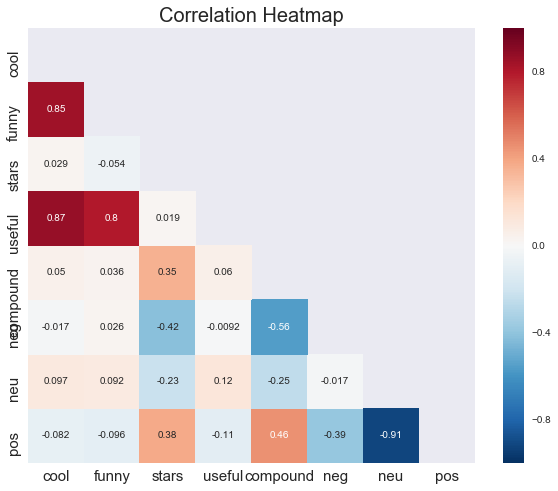

In [27]:
plot_corr(onion_soup_reviews)

## Predict Sentiment of Food

### Benchmark model: Mean of Compound Sentiment, scaled to 1 to 5 stars

Transform continuous `[-1.0, 1.0]` range to discrete `[1, 5]`  

In [28]:
def transform_to_stars(n, lower = -1, upper = 1):
    '''
    Transform n to a discrete value between 1 to 5, inclusive.
    '''
    if n < lower or n > upper:
        print(f'OutOfRangeError: Set n between [{lower},{upper}]')
        return None
    
    interval = np.round((upper - lower) / 9, 2)
    bins = [np.round(lower + i*interval, 2) for i in range(0,10)]
#     print(interval)
#     print(bins)
    
    # one star is the lowest rating, can't get 0.5 star
    n_categories = 9
    
    for i in range(2,11):
        if bins[i-2] <= n <= bins[i-1]:
#             print(i)
            return i/2

    if n >= bins[-1]:
        return 5.0


In [29]:
def rescale_to_stars(scores, lower = -1, upper = 1):
    '''
    Rescale list of values to discrete values between 1 to 5, inclusive.

    Distributes the 5-star system to a uniform distribution of the input range.
    '''    
    interval = np.round((upper - lower) / 5, 2)
    bins = [np.round(lower + i*interval, 2) for i in range(0, 6)]

    return list(pd.cut(scores, bins = bins, labels = np.arange(1, 6, 1), include_lowest = True))


#### Review-Level Predictions

In [30]:
onion_soup_reviews['stars_pred'] = rescale_to_stars(onion_soup_reviews['compound'])

In [31]:
onion_soup_reviews[['text', 'compound', 'stars', 'stars_pred']].head()

,text,compound,stars,stars_pred
0,"Other than being right across the Fountains of Bellagio, I'm not quite sure what the hype is about this place. We came here for brunch during peak hour, but luckily had a reservation so ended up waiting only a few minutes. Our table ordered Bordelaise Steak Frites (with caramelized onion and red wine sauce); Chicken and Mushroom Crepe (with kale and brie); Seafood Crepe (with scallops, shrimp, peas and cream); Onion soup; and Eggs Benedict (with Canadian bacon and hollandaise sauce). The steak frites and onion soup were the best things we ordered. Steak frites came with a huge chunk of juicy steak and a side of crispy, salted fries. Onion soup was also a nice, big portion, but I can't say it stood out from other onion soups I've had. Can't speak for the chicken and mushroom crepe since I didn't get to try it, but everything else truthfully fell short of expectations. The seafood crepe not only lacked flavor, but also was too creamy and heavy for my taste. The large pieces of shrimp and scallops saved the dish, but overall, the crepe was just okay. Eggs benedict here is definitely not a stand-out dish, either. The muffin was too hard and I've definitely had better hollandaise sauce.",0.9895,2.0,5
1,"French onion soup was watery with little taste. We sent it back and were refunded the cost. The wait staff also forgot that we were there for a birthday and didn't bring out a candle for dessert. On the plus side my trout was wonderful and my wife enjoyed her scallops. We've been a number of times but this last meal has tarnished that ""must visit"" image. Pricing is reasonable for Vegas and reservations can usual be booked same day.",0.5647,3.0,4
2,"Where to begin! Now our dining experience here was not a common one - we were treated to dinner here. We ate almost everything on the menu - although their French Onion Soup wasn't spectacular, their baked goat cheese, fresh French bread and steaks were to die for. They had a great wine selection, and our server, Angie, was phenomenal. She had great wine recommendations and was overall a joy to have. Would definitely eat here again! Thank you George at the Paris for everything!",0.9475,5.0,5
3,"Charming resturant that looks like it would be heavily overpriced. Been here twice now and really enoued the onion soup, they are not stingey on the gruyer cheese! Endive and pear salad was a bit salty for my taste but there's plenty more to choose from. Baugettes were real tasty!",0.5767,4.0,4
4,"This review is long overdue! I have been eating here for years, it is always on my ""must have"" list when visiting vegas. I have NEVER been disappointed with the food or service in the many years I have eaten here. I love everything on the menu. EVERYTHING. Honestly you cant go wrong. The french onion soup, the bread, the steaks, the seafood, dessert - it is all fabulous. Thank you mon ami for being my favorite vegas restaurant!",0.9674,5.0,5


#### Sentence-Level Predictions

In [33]:
onion_soup_sentences['stars_pred'] = rescale_to_stars(onion_soup_sentences['compound'])
onion_soup_sentences[['text', 'compound', 'stars_pred']].head()


,text,compound,stars_pred
0,"Our table ordered Bordelaise Steak Frites (with caramelized onion and red wine sauce); Chicken and Mushroom Crepe (with kale and brie); Seafood Crepe (with scallops, shrimp, peas and cream); Onion soup; and Eggs Benedict (with Canadian bacon and hollandaise sauce)",0.0000,3
1,The steak frites and onion soup were the best things we ordered,0.6369,5
2,"Onion soup was also a nice, big portion, but I can't say it stood out from other onion soups I've had",0.2263,4
3,French onion soup was watery with little taste,0.0000,3
4,"We ate almost everything on the menu - although their French Onion Soup wasn't spectacular, their baked goat cheese, fresh French bread and steaks were to die for",-0.3818,2


#### Entity-Level Predictions

In [34]:
onion_soup_chunks['stars_pred'] = rescale_to_stars(onion_soup_chunks['compound'])
onion_soup_chunks[['text', 'compound', 'stars_pred']].head()


,text,compound,stars_pred
0,scallops shrimp peas and cream onion soup and eggs benedict with canadian,0.0000,3
1,the steak frites and onion soup were the best things we,0.6369,5
2,onion soup was also a nice big,0.4215,4
3,french onion soup was watery with little taste,0.0000,3
4,the menu although their french onion soup was n't spectacular their baked,0.0000,3


### Final predictions without dropping `compound=0` rows

#### Using the mean of `compound`

In [35]:
# final prediction
review_score = np.round(onion_soup_reviews['compound'].mean(), 4)
sentence_score = np.round(onion_soup_sentences['compound'].mean(), 4)
chunk_score = np.round(onion_soup_chunks['compound'].mean(), 4)

print(f'Review-level Score:\t{review_score}')
print(f'Review-level Rating:\t{transform_to_stars(review_score)}')
print()
print(f'Sentence-level Score:\t{sentence_score}')
print(f'Sentence-level Rating:\t{transform_to_stars(sentence_score)}')
print()
print(f'Entity-level Score:\t{chunk_score}')
print(f'Entity-level Rating:\t{transform_to_stars(chunk_score)}')



Review-level Score:	0.8735
Review-level Rating:	5.0

Sentence-level Score:	0.3865
Sentence-level Rating:	4.0

Entity-level Score:	0.2408
Entity-level Rating:	3.5


#### Using the mean of `stars_pred`

In [36]:
# final prediction
review_star_score = np.round(onion_soup_reviews['stars_pred'].mean(), 1)
sentence_star_score = np.round(onion_soup_sentences['stars_pred'].mean(), 1)
chunk_star_score = np.round(onion_soup_chunks['stars_pred'].mean(), 1)

print(f'Review-level Rating:\t{review_star_score}')
print(f'Sentence-level Rating:\t{sentence_star_score}')
print(f'Entity-level Rating:\t{chunk_star_score}')

Review-level Rating:	4.8
Sentence-level Rating:	4.0
Entity-level Rating:	3.6


### Final predictions after dropping `compound=0` rows

In [37]:
# drop compound=0
onion_soup_reviews2   = onion_soup_reviews.drop(onion_soup_reviews[onion_soup_reviews['compound']==0].index)
onion_soup_sentences2 = onion_soup_sentences.drop(onion_soup_sentences[onion_soup_sentences['compound']==0].index)
onion_soup_chunks2    = onion_soup_chunks.drop(onion_soup_chunks[onion_soup_chunks['compound']==0].index)



#### Using the mean of `compound`

In [38]:
# final prediction
review_score2 = np.round(onion_soup_reviews2['compound'].mean(), 4)
sentence_score2 = np.round(onion_soup_sentences2['compound'].mean(), 4)
chunk_score2 = np.round(onion_soup_chunks2['compound'].mean(), 4)

print(f'Review-level Score:\t{review_score2}')
print(f'Review-level Rating:\t{transform_to_stars(review_score2)}')
print()
print(f'Sentence-level Score:\t{sentence_score2}')
print(f'Sentence-level Rating:\t{transform_to_stars(sentence_score2)}')
print()
print(f'Entity-level Score:\t{chunk_score2}')
print(f'Entity-level Rating:\t{transform_to_stars(chunk_score2)}')

Review-level Score:	0.8755
Review-level Rating:	5.0

Sentence-level Score:	0.5155
Sentence-level Rating:	4.0

Entity-level Score:	0.4138
Entity-level Rating:	4.0


#### Using the mean of `stars_pred`

In [39]:
# final prediction
review_star_score2 = np.round(onion_soup_reviews2['stars_pred'].mean(), 1)
sentence_star_score2 = np.round(onion_soup_sentences2['stars_pred'].mean(), 1)
chunk_star_score2 = np.round(onion_soup_chunks2['stars_pred'].mean(), 1)

print(f'Review-level Rating:\t{review_star_score2}')
print(f'Sentence-level Rating:\t{sentence_star_score2}')
print(f'Entity-level Rating:\t{chunk_star_score2}')

Review-level Rating:	4.8
Sentence-level Rating:	4.3
Entity-level Rating:	4.0


In [40]:
business_df = pd.read_csv('../data/interim/restaurants.csv')

In [41]:
business_df[business_df['business_id'] == '4JNXUYY8wbaaDmk3BPzlWw']

,name,business_id,stars,review_count,categories,longitude,latitude,postal_code,city,state
42060,Mon Ami Gabi,4JNXUYY8wbaaDmk3BPzlWw,4.0,7968,"Steakhouses, Breakfast & Brunch, Restaurants, French",-115.172581,36.112827,89109,Las Vegas,NV


### Plot Distribution of Sentiments

In [42]:
def compare_hist(cols, titles, xlabel, ylabel, bins = 30):
    ncols = len(cols)
    fig, axes = plt.subplots(ncols   = ncols, 
                             figsize = (5*ncols, 5), 
                             sharex  = True)
    for i in range(ncols):
        axes[i].hist(cols[i], bins = bins)
        
        axes[i].set_title(titles[i], fontsize = 20)
        axes[i].set_xlabel(xlabel, fontsize = 15)
        axes[i].set_ylabel(ylabel, fontsize = 15)
        
    plt.tight_layout()


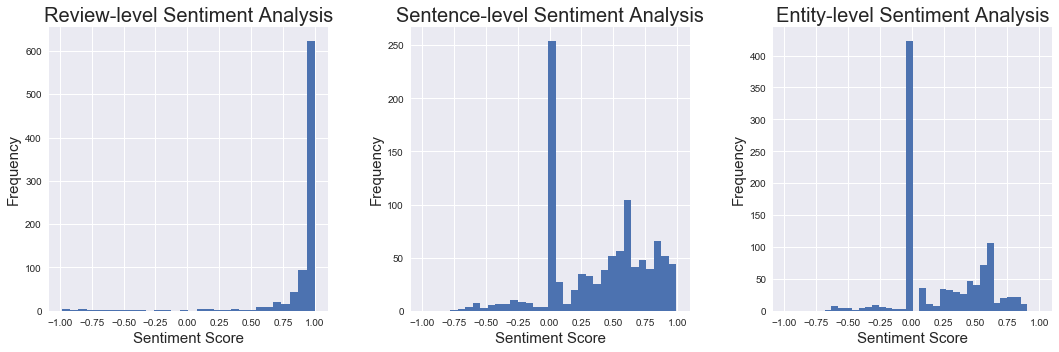

In [43]:
compare_hist([onion_soup_reviews['compound'], onion_soup_sentences['compound'], onion_soup_chunks['compound']],
             titles = ['Review-level Sentiment Analysis', 'Sentence-level Sentiment Analysis', 'Entity-level Sentiment Analysis'],
             xlabel = 'Sentiment Score',
             ylabel = 'Frequency')


At the review-level, `compound` sentiment scores tend to be inflated towards the maximum value. This may be due to a limitation of the nltk SIA on large documents.   

At the sentence-level, `compound` sentiment scores start to have a more interesting distribution.  
However, there appears to be a high frequency of neutral scores (`compound`~=0). Could this be due to mixed sentiments within sentences? This may affect the true distribution. **Entity-level** SIA may be able to address this issue.  
Edit (2/2/19): Entity-level SIA reveals that even more chunks have perfectly neutral or undeterminable sentiments.

Reviews with no sentiment score will be dropped.




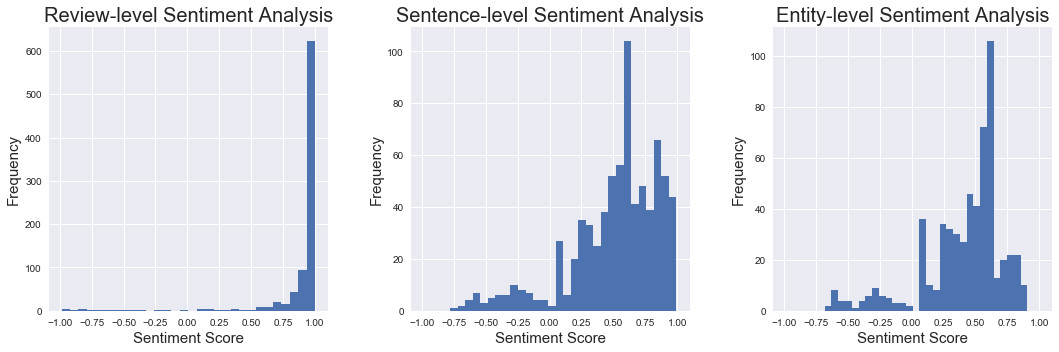

In [44]:
compare_hist([onion_soup_reviews2['compound'], onion_soup_sentences2['compound'], onion_soup_chunks2['compound']],
             titles = ['Review-level Sentiment Analysis', 'Sentence-level Sentiment Analysis', 'Entity-level Sentiment Analysis'],
             xlabel = 'Sentiment Score',
             ylabel = 'Frequency')
